In [ ]:
# mount to drive 
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sqlite3 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn import metrics 

! pip install -qq datasets
from torch.utils.data import DataLoader 
from datasets import load_dataset 
from datasets import load_from_disk 

! pip install imblearn 
from imblearn.over_sampling import SMOTE

import time
from collections import Counter 

     |████████████████████████████████| 325 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 136 kB 52.0 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 212 kB 50.0 MB/s 
     |████████████████████████████████| 127 kB 51.1 MB/s 
     |████████████████████████████████| 271 kB 43.0 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 144 kB 47.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Dataset Preparation 

###Dataset Descriptions 
**Citation**: Lieberoth A, Rasmussen J, Stoeckli S, et al. COVIDiSTRESS global survey. Published online March 30, 2020. doi:10.17605/OSF.IO/Z39US

**Access URL**: https://osf.io/z39us/


In [ ]:
# Only run cells prior to the one that loads dataset from gdrive if first time running script/made changes to the original dataset 
# load the dataset
# Note: change to own path EVERYTIME you run this cell 
data = pd.read_csv("/content/gdrive/MyDrive/CBB750 Group Project/COVIDiSTRESS_May_30_cleaned_final.csv", encoding='ISO-8859-1') 
print(len(data))
# select only rows where answered_all = Yes 
# drop irrelevant columns and rows with NaN values 
data = data[data['answered_all']=="Yes"] 
data = data.drop(columns=['Duration..in.seconds.', 'AD_gain', 'AD_loss', 'AD_check', 'Scale_SLON_1', 'Scale_SLON_2', 'Scale_SLON_3', 'UserLanguage', 'Dem_Expat', 'OECD_people_1', 'OECD_people_2', 'OECD_insititutions_1', 'OECD_insititutions_2', 'OECD_insititutions_3', 'OECD_insititutions_4', 'OECD_insititutions_5', 'OECD_insititutions_6', 'Corona_concerns_1', 'Corona_concerns_2', 'Corona_concerns_3', 'Corona_concerns_4', 'Corona_concerns_5', 'Trust_countrymeasure', 'Compliance_1', 'Compliance_2', 'Compliance_3', 'Compliance_4', 'Compliance_5', 'Compliance_6', 'born_92', 'experience_war', 'experience_war_TXT', 'war_injury', 'loss_during_war', 'time_spent_in_war', 'time_spent_in_war_TXT', 'Scale_UCLA_TRI_1', 'Scale_UCLA_TRI_2', 'Scale_UCLA_TRI_3', 'Scale_UCLA_TRI_4', 'PS_PTSD_1', 'PS_PTSD_2', 'PS_PTSD_3', 'PS_PTSD_4', 'PS_PTSD_5', 'BFF_15_1', 'BFF_15_2', 'BFF_15_3', 'BFF_15_4', 'BFF_15_5', 'BFF_15_6', 'BFF_15_7', 'BFF_15_8', 'BFF_15_9', 'BFF_15_10', 'BFF_15_11', 'BFF_15_12', 'BFF_15_13', 'BFF_15_14', 'BFF_15_15', 'Expl_Distress_1', 'Expl_Distress_2', 'Expl_Distress_3', 'Expl_Distress_4', 'Expl_Distress_5', 'Expl_Distress_6', 'Expl_Distress_7', 'Expl_Distress_8', 'Expl_Distress_9', 'Expl_Distress_10', 'Expl_Distress_11', 'Expl_Distress_12', 'Expl_Distress_13', 'Expl_Distress_14', 'Expl_Distress_15', 'Expl_Distress_16', 'Expl_Distress_17', 'Expl_Distress_18', 'Expl_Distress_19', 'Expl_Distress_20', 'Expl_Distress_21', 'Expl_Distress_22', 'Expl_Distress_23', 'Expl_Distress_24', 'Expl_Distress_txt', 'SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5', 'SPS_6', 'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10', 'Expl_Coping_1', 'Expl_Coping_2', 'Expl_Coping_3', 'Expl_Coping_4', 'Expl_Coping_5', 'Expl_Coping_6', 'Expl_Coping_7', 'Expl_Coping_8', 'Expl_Coping_9', 'Expl_Coping_10', 'Expl_Coping_11', 'Expl_Coping_12', 'Expl_Coping_13', 'Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16', 'Expl_coping_txt', 'Expl_media_1', 'Expl_media_2', 'Expl_media_3', 'Expl_media_4', 'Expl_media_5', 'Expl_media_6', 'Final_open', 'PSS10_avg', 'SLON3_avg', 'neu', 'ext', 'ope', 'agr', 'con', 'SPS_avg', 'Scale_UCLA_TRI_avg']) 

print(len(data))
data.head() 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


125304
53230


ID answered_all   RecordedDate  Dem_age                  Dem_gender  \
5    6          Yes  5/29/20 21:25       68                        Male   
6    7          Yes  5/29/20 21:25       29  Other/would rather not say   
7    8          Yes  5/29/20 21:25       38                      Female   
11  12          Yes  5/29/20 20:18       31                      Female   
13  14          Yes  5/29/20 19:56       49                      Female   

                                              Dem_edu  \
5                    College degree, bachelor, master   
6   Some College, short continuing education or eq...   
7                            Up to 12 years of school   
11                   College degree, bachelor, master   
13  Some College, short continuing education or eq...   

                   Dem_edu_mom      Dem_employment    Country  \
5               College degree             Retired      Italy   
6   Some College or equivalent  Part time employed  Argentina   
7     Up to 12 years of school        Not employed  Argentina   
11              College degree  Full time employed  Argentina   
13    Up to 12 years of school  Part time employed  Argentina   

           Dem_state  ... Scale_PSS10_UCLA_1  Scale_PSS10_UCLA_2  \
5            liguria  ...                1.0                 2.0   
6             Chubut  ...                2.0                 2.0   
7         Entre Rios  ...                3.0                 3.0   
11  Tierra del fuego  ...                2.0                 1.0   
13          Santa Fe  ...                1.0                 2.0   

   Scale_PSS10_UCLA_3 Scale_PSS10_UCLA_4  Scale_PSS10_UCLA_5  \
5                 3.0                4.0                 4.0   
6                 3.0                4.0                 3.0   
7                 3.0                4.0                 4.0   
11                4.0                4.0                 3.0   
13                2.0                4.0                 4.0   

    Scale_PSS10_UCLA_6  Scale_PSS10_UCLA_7  Scale_PSS10_UCLA_8  \
5                  2.0                 4.0                 4.0   
6                  3.0                 5.0                 3.0   
7                  3.0                 4.0                 4.0   
11                 3.0                 3.0                 2.0   
13                 2.0                 4.0                 4.0   

    Scale_PSS10_UCLA_9  Scale_PSS10_UCLA_10  
5                  2.0                  3.0  
6                  2.0                  2.0  
7                  3.0                  3.0  
11                 3.0                  2.0  
13                 3.0                  1.0  

[5 rows x 26 columns]

In [ ]:
data_with_full_scores = data[['ID', 'Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2',	'Scale_PSS10_UCLA_3',	'Scale_PSS10_UCLA_4',	'Scale_PSS10_UCLA_5',	'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7',	'Scale_PSS10_UCLA_8',	'Scale_PSS10_UCLA_9',	'Scale_PSS10_UCLA_10']]
data_with_full_scores.head() 

ID  Scale_PSS10_UCLA_1  Scale_PSS10_UCLA_2  Scale_PSS10_UCLA_3  \
5    6                 1.0                 2.0                 3.0   
6    7                 2.0                 2.0                 3.0   
7    8                 3.0                 3.0                 3.0   
11  12                 2.0                 1.0                 4.0   
13  14                 1.0                 2.0                 2.0   

    Scale_PSS10_UCLA_4  Scale_PSS10_UCLA_5  Scale_PSS10_UCLA_6  \
5                  4.0                 4.0                 2.0   
6                  4.0                 3.0                 3.0   
7                  4.0                 4.0                 3.0   
11                 4.0                 3.0                 3.0   
13                 4.0                 4.0                 2.0   

    Scale_PSS10_UCLA_7  Scale_PSS10_UCLA_8  Scale_PSS10_UCLA_9  \
5                  4.0                 4.0                 2.0   
6                  5.0                 3.0                 2.0   
7                  4.0                 4.0                 3.0   
11                 3.0                 2.0                 3.0   
13                 4.0                 4.0                 3.0   

    Scale_PSS10_UCLA_10  
5                   3.0  
6                   2.0  
7                   3.0  
11                  2.0  
13                  1.0

In [ ]:
# encode predictor (age, gender, edu, edu_mom, employment, country, marital status, dependents, risk group, isolation, isolation adults, isolation kids) values 
# to allow condensation/vectorization of predictors 
# to be used later in logistic regression model 

predictor_columns = ['Dem_age', 'Dem_gender', 'Dem_edu', 'Dem_edu_mom',
       'Dem_employment', 'Country', 'Dem_maritalstatus',
       'Dem_dependents', 'Dem_riskgroup', 'Dem_isolation',
       'Dem_isolation_adults', 'Dem_isolation_kids'] 

# save encoding-decoding pairs 
decoding_key = {} 

for col in predictor_columns: 
  vec = [] 
  # find universal order of unique values in each predictor column 
  values = list(set(data[col]))
  # get encoding 
  for i in data[col]: 
    encoding = values.index(i) 
    vec.append(encoding) 
  # populate decoder 
  for v in range(len(values)): 
    key = col+"_"+str(v)
    decoding_key[key] = values[v] 
  data[col] = vec

# all age increased by 18 (original encoding 18=0, 19=1, etc.) 
fixed_age = []
for i in data['Dem_age']:
  fixed_age.append(i+18)
data['Dem_age'] = fixed_age 

data.head() 

ID answered_all   RecordedDate  Dem_age  Dem_gender  Dem_edu  Dem_edu_mom  \
5    6          Yes  5/29/20 21:25       68           2        1            3   
6    7          Yes  5/29/20 21:25       29           1        3            2   
7    8          Yes  5/29/20 21:25       38           0        7            7   
11  12          Yes  5/29/20 20:18       31           0        1            3   
13  14          Yes  5/29/20 19:56       49           0        3            7   

    Dem_employment  Country         Dem_state  ...  Scale_PSS10_UCLA_1  \
5                2       72           liguria  ...                 1.0   
6                3       74            Chubut  ...                 2.0   
7                4       74        Entre Rios  ...                 3.0   
11               0       74  Tierra del fuego  ...                 2.0   
13               3       74          Santa Fe  ...                 1.0   

    Scale_PSS10_UCLA_2  Scale_PSS10_UCLA_3  Scale_PSS10_UCLA_4  \
5                  2.0                 3.0                 4.0   
6                  2.0                 3.0                 4.0   
7                  3.0                 3.0                 4.0   
11                 1.0                 4.0                 4.0   
13                 2.0                 2.0                 4.0   

    Scale_PSS10_UCLA_5  Scale_PSS10_UCLA_6  Scale_PSS10_UCLA_7  \
5                  4.0                 2.0                 4.0   
6                  3.0                 3.0                 5.0   
7                  4.0                 3.0                 4.0   
11                 3.0                 3.0                 3.0   
13                 4.0                 2.0                 4.0   

    Scale_PSS10_UCLA_8  Scale_PSS10_UCLA_9  Scale_PSS10_UCLA_10  
5                  4.0                 2.0                  3.0  
6                  3.0                 2.0                  2.0  
7                  4.0                 3.0                  3.0  
11                 2.0                 3.0                  2.0  
13                 4.0                 3.0                  1.0  

[5 rows x 26 columns]

In [ ]:
# vectorize predictor values 
# vector output placeholder 
vecs = [] 

for i in range(len(data)): 
  vec = [0]*len(predictor_columns) 
  for col in predictor_columns: 
    fea_index = predictor_columns.index(col) 
    vec[fea_index] = data.iloc[i][col] 
  vecs.append(vec)
data['Vectorized_predictors'] = vecs 
data = data.drop(columns=predictor_columns) 
data.head() 

ID answered_all   RecordedDate         Dem_state  Scale_PSS10_UCLA_1  \
5    6          Yes  5/29/20 21:25           liguria                 1.0   
6    7          Yes  5/29/20 21:25            Chubut                 2.0   
7    8          Yes  5/29/20 21:25        Entre Rios                 3.0   
11  12          Yes  5/29/20 20:18  Tierra del fuego                 2.0   
13  14          Yes  5/29/20 19:56          Santa Fe                 1.0   

    Scale_PSS10_UCLA_2  Scale_PSS10_UCLA_3  Scale_PSS10_UCLA_4  \
5                  2.0                 3.0                 4.0   
6                  2.0                 3.0                 4.0   
7                  3.0                 3.0                 4.0   
11                 1.0                 4.0                 4.0   
13                 2.0                 2.0                 4.0   

    Scale_PSS10_UCLA_5  Scale_PSS10_UCLA_6  Scale_PSS10_UCLA_7  \
5                  4.0                 2.0                 4.0   
6                  3.0                 3.0                 5.0   
7                  4.0                 3.0                 4.0   
11                 3.0                 3.0                 3.0   
13                 4.0                 2.0                 4.0   

    Scale_PSS10_UCLA_8  Scale_PSS10_UCLA_9  Scale_PSS10_UCLA_10  \
5                  4.0                 2.0                  3.0   
6                  3.0                 2.0                  2.0   
7                  4.0                 3.0                  3.0   
11                 2.0                 3.0                  2.0   
13                 4.0                 3.0                  1.0   

                     Vectorized_predictors  
5   [68, 2, 1, 3, 2, 72, 2, 0, 1, 0, 1, 0]  
6   [29, 1, 3, 2, 3, 74, 1, 1, 2, 1, 0, 1]  
7   [38, 0, 7, 7, 4, 74, 2, 1, 2, 0, 1, 0]  
11  [31, 0, 1, 3, 0, 74, 3, 0, 1, 1, 3, 0]  
13  [49, 0, 3, 7, 3, 74, 3, 2, 1, 0, 2, 0]

In [ ]:
# process all Scale_PSS10_UCLA_N values to a single number per row to represent the predicted/y values 
# 0 is low risk (score <15), 1 is high risk (score >=15)
# note that this is acceptable because all Scale_PSS10_UCLA_N values have negative sentiment rated on a intensity scale of 1-5, 5 being most negative 
predicted_values = ['Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2',	'Scale_PSS10_UCLA_3',	'Scale_PSS10_UCLA_4',	'Scale_PSS10_UCLA_5',	'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7',	'Scale_PSS10_UCLA_8',	'Scale_PSS10_UCLA_9',	'Scale_PSS10_UCLA_10']
processed_predicted_values = [] 
for i in range(len(data)): 
  sum = 0.0 
  for p in predicted_values: 
    num = int(p.split("_")[3]) 
    if num in [4, 5, 7, 8]: 
      sum -= data.iloc[i][p] 
    else: 
      sum += data.iloc[i][p] 
  if sum < 15: 
    processed_predicted_values.append(0) 
  else: 
    processed_predicted_values.append(1) 
data['Negativity Score'] = processed_predicted_values 
data = data.drop(columns=predicted_values) 
data.head() 

ID answered_all   RecordedDate         Dem_state  \
5    6          Yes  5/29/20 21:25           liguria   
6    7          Yes  5/29/20 21:25            Chubut   
7    8          Yes  5/29/20 21:25        Entre Rios   
11  12          Yes  5/29/20 20:18  Tierra del fuego   
13  14          Yes  5/29/20 19:56          Santa Fe   

                     Vectorized_predictors  Negativity Score  
5   [68, 2, 1, 3, 2, 72, 2, 0, 1, 0, 1, 0]                 0  
6   [29, 1, 3, 2, 3, 74, 1, 1, 2, 1, 0, 1]                 0  
7   [38, 0, 7, 7, 4, 74, 2, 1, 2, 0, 1, 0]                 0  
11  [31, 0, 1, 3, 0, 74, 3, 0, 1, 1, 3, 0]                 0  
13  [49, 0, 3, 7, 3, 74, 3, 2, 1, 0, 2, 0]                 0

In [ ]:
# save dataset to file to reduce runtime of processing (~ 5 mins to get to this point) 
# simply load dataset instead of processing above unless need variables or changed data 
with open('/content/gdrive/MyDrive/CBB750 Group Project/'+"processed_data", 'w', encoding = 'ISO-8859-1') as f:
  data.to_csv(f) 

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/CBB750 Group Project/'+"processed_data", encoding = 'ISO-8859-1') 
# drop 'answered_all' and 'Unnamed: 0' columns and change Vectorized_predictors to list of ints
data = data.drop(columns=['answered_all', 'Unnamed: 0']) 

# change all features in vectors to float (save/load procedure converted it to string) 
int_list = [] 
for str in data['Vectorized_predictors']: 
  lst = str[1:-1].split(", ")
  new_list = [] 
  for i in lst: 
    new_list.append(float(i))
  int_list.append(new_list) 
data['Vectorized_predictors'] = int_list 
print("There are", len(data), "rows in the processed dataset.") 
data.head() 

There are 53230 rows in the processed dataset.


ID   RecordedDate         Dem_state  \
0   6  5/29/20 21:25           liguria   
1   7  5/29/20 21:25            Chubut   
2   8  5/29/20 21:25        Entre Rios   
3  12  5/29/20 20:18  Tierra del fuego   
4  14  5/29/20 19:56          Santa Fe   

                               Vectorized_predictors  Negativity Score  
0  [68.0, 2.0, 1.0, 3.0, 2.0, 72.0, 2.0, 0.0, 1.0...                 0  
1  [29.0, 1.0, 3.0, 2.0, 3.0, 74.0, 1.0, 1.0, 2.0...                 0  
2  [38.0, 0.0, 7.0, 7.0, 4.0, 74.0, 2.0, 1.0, 2.0...                 0  
3  [31.0, 0.0, 1.0, 3.0, 0.0, 74.0, 3.0, 0.0, 1.0...                 0  
4  [49.0, 0.0, 3.0, 7.0, 3.0, 74.0, 3.0, 2.0, 1.0...                 0

In [ ]:
print("# of ns=0 entries:", len(data[data['Negativity Score']==0]))
print("# of ns=1 entries:", len(data[data['Negativity Score']==1]))
print("Imbalance ratio of ns=0/ns=1 entries:", len(data[data['Negativity Score']==0])/len(data[data['Negativity Score']==1]))

# of ns=0 entries: 50247
# of ns=1 entries: 2983
Imbalance ratio of ns=0/ns=1 entries: 16.844451894066378


### SQL Processing 
Create Decoder Tables in SQL relational database that help decode vectorized LR input. 

In [ ]:
# Use SQL relational databse to create table for data which links negativity score to tables representing their full Scale_10_UCLA_N scores 
# primary key (ID)  

conn = sqlite3.connect('db')
c = conn.cursor() 
#Doping tables if already exists.
c.execute("DROP TABLE IF EXISTS db")
c.execute("DROP TABLE IF EXISTS Full_scores")

sql ='''CREATE TABLE IF NOT EXISTS db (
    ID int  NOT NULL, 
    RecordedDate datetime  NOT NULL, 
    Vectorized_predictors varchar(100)  NOT NULL,
    Negativity Score float  NOT NULL,
    PRIMARY KEY (ID)
  );'''
c.execute(sql)

sql ='''CREATE TABLE IF NOT EXISTS Full_scores (
    ID int  NOT NULL, 
    Scale_PSS10_UCLA_1 float  NOT NULL, 
    Scale_PSS10_UCLA_2 float  NOT NULL, 
    Scale_PSS10_UCLA_3 float  NOT NULL, 
    Scale_PSS10_UCLA_4 float  NOT NULL, 
    Scale_PSS10_UCLA_5 float  NOT NULL, 
    Scale_PSS10_UCLA_6 float  NOT NULL, 
    Scale_PSS10_UCLA_7 float  NOT NULL, 
    Scale_PSS10_UCLA_8 float  NOT NULL, 
    Scale_PSS10_UCLA_9 float  NOT NULL, 
    Scale_PSS10_UCLA_10 float  NOT NULL, 
    PRIMARY KEY (ID)
  );'''
c.execute(sql)
conn.commit() 

# turn vector into string in sql table and populate 
temp = data.copy() 
temp_vp = [", ".join(f'{i}') for i in temp['Vectorized_predictors']]
temp['Vectorized_predictors'] = temp_vp 
temp.to_sql('db', conn, if_exists='replace', index = False)

# populate Full_scores table 
data_with_full_scores.to_sql('Full_scores', conn, if_exists='replace', index = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
print("Creating Vectorized_predictors table...")
sql = '''
SELECT ID, Vectorized_predictors 
FROM db 
'''
Vectorized_predictors_df = pd.read_sql(sql, conn) 
display(Vectorized_predictors_df[:5])

print("Creating Recorded_date table...")
sql = '''
SELECT ID, RecordedDate 
FROM db 
'''
Recorded_date_df = pd.read_sql(sql, conn) 
display(Recorded_date_df[:5])

print("Creating Negativity_score table...")
sql = '''
SELECT ID, [Negativity Score] 
FROM db 
'''
Negativity_score_df = pd.read_sql(sql, conn) 
display(Negativity_score_df[:5]) 

print("Creating Score_match table...")
sql = '''
SELECT f.*
FROM db d inner join Full_scores f on d.ID=f.ID  
'''
Score_match_df = pd.read_sql(sql, conn) 
Score_match_df.head() 

Creating Vectorized_predictors table...


ID                              Vectorized_predictors
0   6  [, 6, 8, ., 0, ,,  , 2, ., 0, ,,  , 1, ., 0, ,...
1   7  [, 2, 9, ., 0, ,,  , 1, ., 0, ,,  , 3, ., 0, ,...
2   8  [, 3, 8, ., 0, ,,  , 0, ., 0, ,,  , 7, ., 0, ,...
3  12  [, 3, 1, ., 0, ,,  , 0, ., 0, ,,  , 1, ., 0, ,...
4  14  [, 4, 9, ., 0, ,,  , 0, ., 0, ,,  , 3, ., 0, ,...

Creating Recorded_date table...


ID   RecordedDate
0   6  5/29/20 21:25
1   7  5/29/20 21:25
2   8  5/29/20 21:25
3  12  5/29/20 20:18
4  14  5/29/20 19:56

Creating Negativity_score table...


ID  Negativity Score
0   6                 0
1   7                 0
2   8                 0
3  12                 0
4  14                 0

Creating Score_match table...


ID  Scale_PSS10_UCLA_1  Scale_PSS10_UCLA_2  Scale_PSS10_UCLA_3  \
0   6                 1.0                 2.0                 3.0   
1   7                 2.0                 2.0                 3.0   
2   8                 3.0                 3.0                 3.0   
3  12                 2.0                 1.0                 4.0   
4  14                 1.0                 2.0                 2.0   

   Scale_PSS10_UCLA_4  Scale_PSS10_UCLA_5  Scale_PSS10_UCLA_6  \
0                 4.0                 4.0                 2.0   
1                 4.0                 3.0                 3.0   
2                 4.0                 4.0                 3.0   
3                 4.0                 3.0                 3.0   
4                 4.0                 4.0                 2.0   

   Scale_PSS10_UCLA_7  Scale_PSS10_UCLA_8  Scale_PSS10_UCLA_9  \
0                 4.0                 4.0                 2.0   
1                 5.0                 3.0                 2.0   
2                 4.0                 4.0                 3.0   
3                 3.0                 2.0                 3.0   
4                 4.0                 4.0                 3.0   

   Scale_PSS10_UCLA_10  
0                  3.0  
1                  2.0  
2                  3.0  
3                  2.0  
4                  1.0

# Exploratory Analysis 
Analysis done on separate script. 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 10.9 MB 7.9 MB/s 
     |████████████████████████████████| 596 kB 59.4 MB/s 
     |████████████████████████████████| 102 kB 15.7 MB/s 
     |████████████████████████████████| 690 kB 52.9 MB/s 
     |████████████████████████████████| 4.7 MB 56.6 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 812 kB 56.9 MB/s 
     |████████████████████████████████| 38.1 MB 67.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=f9b8a6710b873bb4923d66edc08c7c0a89cf578de8f4ddc39f2dd577a8a8347c
  Stored in directory: /tmp/pip-ephem-wheel-cache-rzs1pl4x/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e2d992ae11006cc1e3111840beaa283b5f00b179571a44e776fc9719dc161cc7
  Stored in directory: /r

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

df = pd.read_csv('/content/gdrive/MyDrive/CBB750 Group Project/data_for_analysis.csv',  encoding='ISO-8859-1')

In [ ]:
df

ï»¿ID answered_all  Dem_age  Dem_Gender  Dem_Edu  Dem_Edu_Mom  \
0           6          Yes       68           0        6            4   
1           7          Yes       29           1        4            7   
2           8          Yes       38           2        3            3   
3          12          Yes       31           2        6            4   
4          14          Yes       49           2        4            3   
...       ...          ...      ...         ...      ...          ...   
53225  125282          Yes       25           0        6            3   
53226  125285          Yes       44           2        3            2   
53227  125296          Yes       58           0        6            2   
53228  125297          Yes       28           0        6            3   
53229  125300          Yes       33           0        4            3   

       Dem_Employment  Country  Marital_status  Dependents  Risk_Group  \
0                   0      136               0           0           2   
1                   3      121               2           1           1   
2                   5      121               0           1           1   
3                   2      121               1           0           2   
4                   3      121               1           2           2   
...               ...      ...             ...         ...         ...   
53225               4       26               1           0           2   
53226               3       26               0           0           0   
53227               1       26               0           3           1   
53228               2       26               1           0           0   
53229               2       26               1           0           0   

       Isolation  Isolation_Adults  Isolation_Kids  Negativity Score  
0              1                 1               0                 0  
1              4                 0               1                 0  
2              1                 1               0                 0  
3              4                 3               0                 0  
4              1                 2               0                 0  
...          ...               ...             ...               ...  
53225          1                 3               0                 0  
53226          1                 1               0                 0  
53227          1                 1               0                 0  
53228          4                 0               0                 0  
53229          1                 0               0                 0  

[53230 rows x 15 columns]

In [ ]:
profile = ProfileReport(df)
profile.to_notebook_iframe()
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Machine Learning - Logistic Regression Predictive Model 
For each predicting attribute in Age, Disability Status, Education, Gender, Sex, Sexual Orientation, and State: 
create obtain train/test splits and train a Logistic Regression model to predict the value of Indicator and Value. Plot comparative accuracy and individual confusion matrices. Find the best performing (highest-accuracy) predictor for Indicator and Value. 

In [ ]:
LR_model = LogisticRegression() 
predictions = {}

### Predicting with LR

In [ ]:
# train/test split for predicting Indicator 
# only ~2000 entries have negativity scores of 1, therefore use SMOTE to balance training data 
x_train, x_test, y_train, y_test = train_test_split(np.stack(data.Vectorized_predictors), data['Negativity Score'], test_size=0.25, random_state=0)
sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_resample(x_train, y_train)
LR_model.fit(x_train, y_train) 
y_pred=LR_model.predict(x_test) 
score = metrics.accuracy_score(y_test, y_pred) 
predictions["LR"] = (y_pred, score) 
print("Predicted result is:", y_pred)
print("Prediction accuracy is:", score) 

Predicted result is: [1 1 0 ... 0 1 0]
Prediction accuracy is: 0.6095581605049594


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#plot confusion matrix in heatmap 
cm = metrics.confusion_matrix(y_test, y_pred) 
# class_names=["Symptoms of Anxiety Disorder", "Symptoms of Anxiety Disorder or Depressive Disorder", "Symptoms of Depressive Disorder"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

### Predicting with K Nearest Neighbors Classifier

In [ ]:
# predicting with KNN (n=5) 
from sklearn.neighbors import KNeighborsClassifier as KNN 
KNN_model = KNN(n_neighbors=5)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
KNN_score = KNN_model.score(x_test, y_test)
predictions["KNN"] = (y_pred, score) 
print("Prediction accuracy with KNN model is", KNN_score) 

Prediction accuracy with KNN model is 0.744063721070033


In [ ]:
#plot confusion matrix in heatmap 
cm = metrics.confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

### Predicting with Random Forest Classifier


In [ ]:
# predicting with random forest 
from sklearn.ensemble import RandomForestClassifier as RFC 
RF_model = RFC(max_depth=2, random_state=0)
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
RF_score = RF_model.score(x_test, y_test)
predictions["RF"] = (y_pred, score) 
print("Prediction accuracy with RF model is", RF_score) 

Prediction accuracy with RF model is 0.7345205891193267


In [ ]:
#plot confusion matrix in heatmap 
cm = metrics.confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

Text(0.5, 257.44, 'Predicted label')

### Re-run Models After Feature Selection (n=3)


In [ ]:
# Feature Selection 
from sklearn.feature_selection import SelectKBest, chi2 

x_train, x_test, y_train, y_test = train_test_split(np.stack(data.Vectorized_predictors), data['Negativity Score'], test_size=0.25, random_state=0)
sm = SMOTE(random_state=0)
print(x_train[:2])
x_train, y_train = sm.fit_resample(x_train, y_train)
x_train = SelectKBest(chi2, k=3).fit_transform(x_train, y_train) 
x_train[:2]

print("Best features are those at index 0, 4, and 6, corresponding to: 'Dem_age', 'Dem_employment', and 'Dem_maritalstatus' respectively.") 

[[ 26.   2.   1.   2.   0. 118.   3.   0.   0.   1.   5.   0.]
 [ 27.   0.   1.   3.   4.  99.   3.   0.   2.   1.   1.   0.]]
Best features are those at index 0, 4, and 6, corresponding to: 'Dem_age', 'Dem_employment', and 'Dem_maritalstatus' respectively.


In [ ]:
# prepare all data to only have three features 'Dem_age', 'Dem_employment', and 'Dem_maritalstatus' 
fea_selection_vecs = [] 
for i in data['Vectorized_predictors']: 
  vec = [i[0], i[4], i[6]] 
  fea_selection_vecs.append(vec)
data['Feature Selection Vectors'] = fea_selection_vecs
data.head() 

ID   RecordedDate         Dem_state  \
0   6  5/29/20 21:25           liguria   
1   7  5/29/20 21:25            Chubut   
2   8  5/29/20 21:25        Entre Rios   
3  12  5/29/20 20:18  Tierra del fuego   
4  14  5/29/20 19:56          Santa Fe   

                               Vectorized_predictors  Negativity Score  \
0  [68.0, 2.0, 1.0, 3.0, 2.0, 72.0, 2.0, 0.0, 1.0...                 0   
1  [29.0, 1.0, 3.0, 2.0, 3.0, 74.0, 1.0, 1.0, 2.0...                 0   
2  [38.0, 0.0, 7.0, 7.0, 4.0, 74.0, 2.0, 1.0, 2.0...                 0   
3  [31.0, 0.0, 1.0, 3.0, 0.0, 74.0, 3.0, 0.0, 1.0...                 0   
4  [49.0, 0.0, 3.0, 7.0, 3.0, 74.0, 3.0, 2.0, 1.0...                 0   

  Feature Selection Vectors  
0          [68.0, 2.0, 2.0]  
1          [29.0, 3.0, 1.0]  
2          [38.0, 4.0, 2.0]  
3          [31.0, 0.0, 3.0]  
4          [49.0, 3.0, 3.0]

In [ ]:
# prepare dataset for model input 
x_train, x_test, y_train, y_test = train_test_split(np.stack(data['Feature Selection Vectors']), data['Negativity Score'], test_size=0.25, random_state=0)
sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_resample(x_train, y_train) 

In [ ]:
FS_predictions = {} 

#### Logistic Regression 

In [ ]:
LR_model = LogisticRegression() 
LR_model.fit(x_train, y_train) 
y_pred=LR_model.predict(x_test) 
score = metrics.accuracy_score(y_test, y_pred) 
FS_predictions["LR"] = (y_pred, score) 
print("Predicted result is:", y_pred)
print("Prediction accuracy is:", score) 

Predicted result is: [1 1 0 ... 0 1 0]
Prediction accuracy is: 0.5665013525698828


In [ ]:
# plot confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred) 
# class_names=["Symptoms of Anxiety Disorder", "Symptoms of Anxiety Disorder or Depressive Disorder", "Symptoms of Depressive Disorder"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

#### K Nearest Neighbors 

In [ ]:
# predicting with KNN (n=5) 
KNN_model = KNN(n_neighbors=5)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
KNN_score = KNN_model.score(x_test, y_test)
FS_predictions["KNN"] = (y_pred, KNN_score) 
print("Prediction accuracy with KNN model is", KNN_score) 

Prediction accuracy with KNN model is 0.9370303576795912


In [ ]:
# plot confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred) 
# class_names=["Symptoms of Anxiety Disorder", "Symptoms of Anxiety Disorder or Depressive Disorder", "Symptoms of Depressive Disorder"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

#### Random Forest Classifier 

In [ ]:
# predicting with RFC 
RF_model = RFC(max_depth=2, random_state=0)
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
RF_score = RF_model.score(x_test, y_test)
FS_predictions["RF"] = (y_pred, RF_score) 
print("Prediction accuracy with RF model is", RF_score) 

Prediction accuracy with RF model is 0.5810039074241058


In [ ]:
# plot confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred) 
# class_names=["Symptoms of Anxiety Disorder", "Symptoms of Anxiety Disorder or Depressive Disorder", "Symptoms of Depressive Disorder"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

# Analysis of Prediction by Best-performing Model (KNN) after Feature Selection 

In [ ]:
# get list of all predictors in KNN 
predictions = FS_predictions.get("KNN")[0]
score = FS_predictions.get("KNN")[1] 
num_preds = len(predictions) 
print("Check num of x_test entries = num of preds:", len(x_test) == num_preds) 

Check num of x_test entries = num of preds: True


In [ ]:
# create dataframe of prediction v.s. predictors 
age = [i[0] for i in x_train]
emp = [i[1] for i in x_train]
ms = [i[2] for i in x_train]
df_pp = pd.DataFrame(data=zip(age, emp, ms, predictions))
df_pp.columns = ['Age', 'Employment', 'Marital_status', 'Predictions']
df_pp.head(10) 

Age  Employment  Marital_status  Predictions
0  26.0         0.0             3.0            0
1  27.0         4.0             3.0            0
2  37.0         0.0             2.0            0
3  23.0         1.0             3.0            0
4  25.0         5.0             3.0            0
5  38.0         0.0             2.0            0
6  46.0         0.0             2.0            0
7  61.0         0.0             2.0            0
8  51.0         3.0             2.0            0
9  36.0         4.0             2.0            0

In [ ]:
# separate dataframes into high and low risk
high_risk = df_pp[df_pp['Predictions']== 1].reset_index().drop(columns=['index'])
print("High risk:", len(high_risk))
display(high_risk.head())
low_risk = df_pp[df_pp['Predictions']== 0].reset_index().drop(columns=['index'])
print("Low risk:", len(low_risk))
display(low_risk.head())

High risk: 117


Age  Employment  Marital_status  Predictions
0  38.0         5.0             2.0            1
1  43.0         0.0             2.0            1
2  46.0         0.0             2.0            1
3  21.0         1.0             3.0            1
4  23.0         4.0             3.0            1

Low risk: 13191


Age  Employment  Marital_status  Predictions
0  26.0         0.0             3.0            0
1  27.0         4.0             3.0            0
2  37.0         0.0             2.0            0
3  23.0         1.0             3.0            0
4  25.0         5.0             3.0            0

In [ ]:
# find distribution of each predictor in high_risk group 
high_age_counts = Counter(high_risk['Age'])
for i in high_age_counts.keys():
  high_age_counts[i] = 100*high_age_counts.get(i)/len(high_risk)
sns.lineplot(high_age_counts.keys(), high_age_counts.values()) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
high_emp_counts = Counter(high_risk['Employment']) 
for i in high_emp_counts.keys():
  high_emp_counts[i] = 100*high_emp_counts.get(i)/len(high_risk)
# get decodings 
for i in range(6): 
  key = f'Dem_employment_{i}'
  print(i, decoding_key.get(key))
sns.lineplot(high_emp_counts.keys(), high_emp_counts.values()) 

0 Full time employed
1 Student
2 Retired
3 Part time employed
4 Not employed
5 Self-employed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
high_ms_counts = Counter(high_risk['Marital_status'])
for i in high_ms_counts.keys():
  high_ms_counts[i] = 100*high_ms_counts.get(i)/len(high_risk)
# get decodings 
for i in range(5): 
  key = f'Dem_maritalstatus_{i}'
  print(i, decoding_key.get(key))
sns.lineplot(high_ms_counts.keys(), high_ms_counts.values()) 

0 Uninformative response
1 Other or would rather not say
2 Married/cohabiting
3 Single
4 Divorced/widowed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
# find distribution of each predictor in low_risk group 
low_age_counts = Counter(low_risk['Age'])
for i in low_age_counts.keys():
  low_age_counts[i] = 100*low_age_counts.get(i)/len(low_risk)
sns.lineplot(low_age_counts.keys(), low_age_counts.values()) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
low_emp_counts = Counter(low_risk['Employment']) 
for i in low_emp_counts.keys():
  low_emp_counts[i] = 100*low_emp_counts.get(i)/len(low_risk)
# get decodings 
for i in range(6): 
  key = f'Dem_employment_{i}'
  print(i, decoding_key.get(key))
sns.lineplot(low_emp_counts.keys(), low_emp_counts.values()) 

0 Full time employed
1 Student
2 Retired
3 Part time employed
4 Not employed
5 Self-employed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
low_ms_counts = Counter(low_risk['Marital_status']) 
for i in low_ms_counts.keys():
  low_ms_counts[i] = 100*low_ms_counts.get(i)/len(low_risk)
# get decodings 
for i in range(5): 
  key = f'Dem_maritalstatus_{i}'
  print(i, decoding_key.get(key))
sns.lineplot(low_ms_counts.keys(), low_ms_counts.values()) 

0 Uninformative response
1 Other or would rather not say
2 Married/cohabiting
3 Single
4 Divorced/widowed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# NLP Processing of Subreddit Data 

### Data preparation 

In [ ]:
# importing libraries 
!pip install pmaw pandas
from pmaw import PushshiftAPI
import datetime as dt 
import nltk
nltk.download('punkt') 
import itertools 
from nltk import FreqDist 
from nltk.corpus import stopwords
import string 
nltk.download('stopwords') 

     |████████████████████████████████| 176 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
api = PushshiftAPI() 
stop_words = set(stopwords.words('english')+ list(string.punctuation)) 

In [ ]:
#loop once for each year Jan to Nov inclusive for 2020
comments_2020 = [] 
record_date_2020 = []
for i in range(1,12):
  after = int(dt.datetime(2020,i,1,0,0).timestamp())
  before = int(dt.datetime(2020,i+1,1,0,0).timestamp()) 
  subreddit="covid19"
  limit=5000
  comments = list(api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after))
  comments_2020.extend(comments)
  sum = 0  
  for j in comments:
    record_date_2020.append(f"{i}_2020")
    sum += 1
  print(f'Retrieved {sum} comments from Pushshift in month {i} of 2020')
print(f'Retrieved {len(comments_2020)} comments from Pushshift')

Not all PushShift shards are active. Query results may be incomplete.


Retrieved 0 comments from Pushshift in month 1 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 2 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 3 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 4 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 5 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 6 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 7 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 8 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 9 of 2020


Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 10 of 2020


Not all PushShift shards are active. Query results may be incomplete.


Retrieved 5000 comments from Pushshift in month 11 of 2020
Retrieved 50000 comments from Pushshift


In [ ]:
len(record_date_2020)

50000

In [ ]:
#loop once for each year Jan to Nov inclusive for 2021 
comments_2021 = [] 
record_date_2021 = []
for i in range(1,12):
  after = int(dt.datetime(2021,i,1,0,0).timestamp())
  before = int(dt.datetime(2021,i+1,1,0,0).timestamp()) 
  subreddit="covid19"
  limit=5000
  comments = list(api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)) 
  comments_2021.extend(comments) 
  sum = 0 
  for j in comments:
    record_date_2021.append(f"{i}_2021")
    sum += 1 
  print(f'Retrieved {sum} comments from Pushshift in month {i} of 2021')
print(f'Retrieved {len(comments_2021)} comments from Pushshift') 

Retrieved 5000 comments from Pushshift in month 1 of 2021
Retrieved 5000 comments from Pushshift in month 2 of 2021
Retrieved 5000 comments from Pushshift in month 3 of 2021
Retrieved 5000 comments from Pushshift in month 4 of 2021
Retrieved 5000 comments from Pushshift in month 5 of 2021
Retrieved 5000 comments from Pushshift in month 6 of 2021
Retrieved 5000 comments from Pushshift in month 7 of 2021
Retrieved 5000 comments from Pushshift in month 8 of 2021
Retrieved 5000 comments from Pushshift in month 9 of 2021
Retrieved 5000 comments from Pushshift in month 10 of 2021
Retrieved 5000 comments from Pushshift in month 11 of 2021
Retrieved 55000 comments from Pushshift


In [ ]:
len(record_date_2021) 

55000

In [ ]:
# add last month of each year 
dec_2020 = list(api.search_comments(subreddit="covid19", limit=5000, before=int(dt.datetime(2021,1,1,0,0).timestamp()) , after=int(dt.datetime(2020,12,1,0,0).timestamp()) )) 
dec_2021 = list(api.search_comments(subreddit="covid19", limit=5000, before=int(dt.datetime(2022,1,1,0,0).timestamp()) , after=int(dt.datetime(2021,12,1,0,0).timestamp()) )) 
comments_2020.extend(dec_2020)
comments_2021.extend(dec_2021)
print(f'Retrieved {len(dec_2020)} comments in dec 2020') 
print(f'Retrieved {len(dec_2021)} comments in dec 2021') 
for i in dec_2020:
  record_date_2020.append("12_2020")
for i in dec_2021:
  record_date_2021.append("12_2021")
print(f'Retrieved {len(comments_2020)} comments in 2020') 
print(f'Retrieved {len(comments_2021)} comments in 2021') 

Retrieved 5000 comments in dec 2020
Retrieved 5000 comments in dec 2021
Retrieved 55000 comments in 2020
Retrieved 60000 comments in 2021


In [ ]:
comments_2020_df = pd.DataFrame(comments_2020) 
comments_2020_df['Month_Year'] =  record_date_2020 
display(comments_2020_df.head()) 

comments_2021_df = pd.DataFrame(comments_2021) 
comments_2021_df['Month_Year'] =  record_date_2021 
display(comments_2021_df.head()) 

all_awardings associated_award             author  \
0            []             None       Mclovingtjuk   
1            []             None  Ultramarinepurple   
2            []             None            vacacay   
3            []             None  SecretAgentIceBat   
4            []             None        dankhorse25   

  author_flair_background_color author_flair_css_class author_flair_richtext  \
0                          None                   None                    []   
1                          None                   None                    []   
2                          None                   None                    []   
3                          None                   None                    []   
4                          None                   None                    []   

  author_flair_template_id author_flair_text author_flair_text_color  \
0                     None              None                    None   
1                     None              None                    None   
2                     None              None                    None   
3                     None              None                    None   
4                     None              None                    None   

  author_flair_type  ... subreddit subreddit_id total_awards_received  \
0              text  ...   COVID19    t5_2f4l19                     0   
1              text  ...   COVID19    t5_2f4l19                     0   
2              text  ...   COVID19    t5_2f4l19                     0   
3              text  ...   COVID19    t5_2f4l19                     0   
4              text  ...   COVID19    t5_2f4l19                     0   

  distinguished author_cakeday edited  treatment_tags top_awarded_type  \
0           NaN            NaN    NaN             NaN              NaN   
1           NaN            NaN    NaN             NaN              NaN   
2           NaN            NaN    NaN             NaN              NaN   
3           NaN            NaN    NaN             NaN              NaN   
4           NaN            NaN    NaN             NaN              NaN   

  comment_type  Month_Year  
0          NaN      2_2020  
1          NaN      2_2020  
2          NaN      2_2020  
3          NaN      2_2020  
4          NaN      2_2020  

[5 rows x 39 columns]

all_awardings associated_award                author  \
0            []             None         BaconFace2736   
1            []             None         AutoModerator   
2            []             None         traveler19395   
3            []             None  onceinablueberrymoon   
4            []             None             [deleted]   

  author_flair_background_color author_flair_css_class author_flair_richtext  \
0                          None                   None                    []   
1                          None                   None                    []   
2                          None                   None                    []   
3                          None                   None                    []   
4                                                 None                   NaN   

  author_flair_template_id author_flair_text author_flair_text_color  \
0                     None              None                    None   
1                     None              None                    None   
2                     None              None                    None   
3                     None              None                    None   
4                     None              None                    dark   

  author_flair_type  ... controversiality gilded retrieved_utc score_hidden  \
0              text  ...              NaN    NaN           NaN          NaN   
1              text  ...              NaN    NaN           NaN          NaN   
2              text  ...              NaN    NaN           NaN          NaN   
3              text  ...              NaN    NaN           NaN          NaN   
4               NaN  ...              NaN    NaN           NaN          NaN   

  subreddit_name_prefixed subreddit_type edited  unrepliable_reason editable  \
0                     NaN            NaN    NaN                 NaN      NaN   
1                     NaN            NaN    NaN                 NaN      NaN   
2                     NaN            NaN    NaN                 NaN      NaN   
3                     NaN            NaN    NaN                 NaN      NaN   
4                     NaN            NaN    NaN                 NaN      NaN   

  Month_Year  
0     1_2021  
1     1_2021  
2     1_2021  
3     1_2021  
4     1_2021  

[5 rows x 53 columns]

In [ ]:
# combine dataframes and select only the relevant columns 
subreddit_data = comments_2020_df.append(comments_2021_df, ignore_index=True) 
subreddit_data = subreddit_data[["id", "body","subreddit", "Month_Year"]].dropna() 
subreddit_data.head() 

id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year  
0     2_2020  
1     2_2020  
2     2_2020  
3     2_2020  
4     2_2020

In [ ]:
# save dataset to file to reduce runtime of processing (>20 mins) 
# simply load dataset instead of processing above unless need variables or changed data 
with open('/content/gdrive/MyDrive/CBB750 Group Project/'+"subreddit_data", 'w') as f:
  subreddit_data.to_csv(f) 

In [ ]:
subreddit_data = pd.read_csv('/content/gdrive/MyDrive/CBB750 Group Project/'+"subreddit_data") 
subreddit_data = subreddit_data.drop(columns=['Unnamed: 0'])
subreddit_data.head() 

id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year  
0     2_2020  
1     2_2020  
2     2_2020  
3     2_2020  
4     2_2020

In [ ]:
subreddit_data 

id                                               body subreddit  \
0       fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1       fhe9m9v                                            Thanks.   COVID19   
2       fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3       fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4       fhe9ebu  Usually the immune system overreaction stops w...   COVID19   
...         ...                                                ...       ...   
114995  houja05                                       which rules?   COVID19   
114996  houj1r1  google.com is not a source we allow on this su...   COVID19   
114997  houimcy  This should be flaired as a "Case Study", not ...   COVID19   
114998  houikkt  See the latest Q&amp;A over at This Week in Vi...   COVID19   
114999  houhx32  I'm having trouble finding the numbers you're ...   COVID19   

       Month_Year  
0          2_2020  
1          2_2020  
2          2_2020  
3          2_2020  
4          2_2020  
...           ...  
114995    12_2021  
114996    12_2021  
114997    12_2021  
114998    12_2021  
114999    12_2021  

[115000 rows x 4 columns]

In [ ]:
texts = subreddit_data["body"] 
texts 

0         Is there a particular reason I’m some areas yo...
1                                                   Thanks.
2         &gt; pops head out of bunker\n\nheads infected...
3         Hi!\n\nI don’t know if any data specifically o...
4         Usually the immune system overreaction stops w...
                                ...                        
114995                                         which rules?
114996    google.com is not a source we allow on this su...
114997    This should be flaired as a "Case Study", not ...
114998    See the latest Q&amp;A over at This Week in Vi...
114999    I'm having trouble finding the numbers you're ...
Name: body, Length: 115000, dtype: object

In [ ]:
# lowercase the tokens 
tokens_list = [nltk.word_tokenize(f"{doc}".lower()) for doc in texts]
tokens_all = list(itertools.chain.from_iterable(tokens_list)) 

print("There are", len(tokens_all), "tokens in total")

There are 7046803 tokens in total


In [ ]:
# get vocab and add token lists to dataset 
vocab = list(set(tokens_all))
subreddit_data['tokens'] = tokens_list 
print(vocab[:5])
subreddit_data.head() 

['immunoenhancer', '2900404-0', 'worst-affected', 'infectome', '//old.reddit.com/r/covid19/comments/j5sz0y/in_vitro_efficacy_of_artemisininbased_treatments/']


id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year                                             tokens  
0     2_2020  [is, there, a, particular, reason, i, ’, m, so...  
1     2_2020                                        [thanks, .]  
2     2_2020  [&, gt, ;, pops, head, out, of, bunker, heads,...  
3     2_2020  [hi, !, i, don, ’, t, know, if, any, data, spe...  
4     2_2020  [usually, the, immune, system, overreaction, s...

In [ ]:
# get tokens based on frequency 
fdist = FreqDist(tokens_all) 
print(fdist.most_common(10)) 

[('.', 297417), ('the', 244652), (',', 240650), ('of', 131654), ('to', 129051), ('a', 129036), ('and', 117171), ('in', 97303), ('that', 90937), ('is', 88935)]


In [ ]:
# remove stop words
print("The number of tokens BEFORE stop words removal is", len(tokens_all))
# remove stop words
tokens_withno_stopwords = []
for w in tokens_all: 
    if w not in stop_words: 
        tokens_withno_stopwords.append(w)  
# vocabulary size        
print("The number of tokens AFTER stop words removal is", len(tokens_withno_stopwords))

# compute frequency distribution
fdist_no_stopwords = FreqDist(tokens_withno_stopwords) 
print(fdist_no_stopwords.most_common(20))  

The number of tokens BEFORE stop words removal is 7046803
The number of tokens AFTER stop words removal is 3419559
[("'s", 25283), ('’', 24872), ('https', 24128), ('please', 23999), ("n't", 23911), ('people', 20270), ('vaccine', 18791), ('would', 17787), ('removed', 16169), ('gt', 15416), ('**', 15210), ('subreddit', 12694), ('contact', 12501), ('virus', 12346), ("''", 12275), ('moderators', 11802), ('questions', 11635), ('like', 11619), ('covid-19', 11609), ('one', 11259)]


In [ ]:
# label dataframe rows with pre or post vaccine 
pre_vacc_dates = ["1_2020", "2_2020", "3_2020", "4_2020", "5_2020", "6_2020", "7_2020", "8_2020", "9_2020", "10_2020", "11_2020"]
post_vacc_dates = ["12_2020", "1_2021", "2_2021", "3_2021", "4_2021", "5_2021", "6_2021", "7_2021", "8_2021", "9_2021", "10_2021", "11_2021", "12_2021"]
vacc_status = [] 
for i in range(len(subreddit_data)): 
  if f"{subreddit_data.loc[i,'Month_Year']}" in pre_vacc_dates: 
    vacc_status.append('Pre-vaccine')
  else: 
    vacc_status.append('Post-vaccine')
subreddit_data['Vaccine Status'] = vacc_status 
subreddit_data.head() 

id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year                                             tokens Vaccine Status  
0     2_2020  [is, there, a, particular, reason, i, ’, m, so...    Pre-vaccine  
1     2_2020                                        [thanks, .]    Pre-vaccine  
2     2_2020  [&, gt, ;, pops, head, out, of, bunker, heads,...    Pre-vaccine  
3     2_2020  [hi, !, i, don, ’, t, know, if, any, data, spe...    Pre-vaccine  
4     2_2020  [usually, the, immune, system, overreaction, s...    Pre-vaccine

In [ ]:
# find frequency of anxiety/depression-related tokens in each post 
keywords = ['anxiety', 'anxious', 'panic', 'panicking', 'PTSD', 'depression', 'depressed', 'depressing', 'suicide', 'stress', 'stressed', 'trauma', 'traumatic', 'hopeless'] 
keyword_counts = [] 
for i in tokens_list: 
  count = len(set(i).intersection(set(keywords))) 
  keyword_counts.append(count)
subreddit_data['keyword_counts'] = keyword_counts 
subreddit_data.head() 

id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year                                             tokens  \
0     2_2020  [is, there, a, particular, reason, i, ’, m, so...   
1     2_2020                                        [thanks, .]   
2     2_2020  [&, gt, ;, pops, head, out, of, bunker, heads,...   
3     2_2020  [hi, !, i, don, ’, t, know, if, any, data, spe...   
4     2_2020  [usually, the, immune, system, overreaction, s...   

  Vaccine Status  keyword_counts  
0    Pre-vaccine               0  
1    Pre-vaccine               0  
2    Pre-vaccine               0  
3    Pre-vaccine               0  
4    Pre-vaccine               0

In [ ]:
# calculate the frequency of key words 
for i in range(5): 
  print(i, "occurred", list(subreddit_data['keyword_counts']).count(i), "times") 

0 occurred 114053 times
1 occurred 828 times
2 occurred 92 times
3 occurred 20 times
4 occurred 7 times


In [ ]:
# save dataset to file 
# simply load dataset instead of processing above unless need variables or changed data 
with open('/content/gdrive/MyDrive/CBB750 Group Project/'+"subreddit_data_with_vaccine_status", 'w') as f:
  subreddit_data.to_csv(f) 

In [ ]:
subreddit_data = pd.read_csv('/content/gdrive/MyDrive/CBB750 Group Project/'+"subreddit_data_with_vaccine_status") 
subreddit_data = subreddit_data.drop(columns=['Unnamed: 0'])
subreddit_data.head() 

id                                               body subreddit  \
0  fhe9p79  Is there a particular reason I’m some areas yo...   COVID19   
1  fhe9m9v                                            Thanks.   COVID19   
2  fhe9le2  &gt; pops head out of bunker\n\nheads infected...   COVID19   
3  fhe9gpe  Hi!\n\nI don’t know if any data specifically o...   COVID19   
4  fhe9ebu  Usually the immune system overreaction stops w...   COVID19   

  Month_Year                                             tokens  \
0     2_2020  ['is', 'there', 'a', 'particular', 'reason', '...   
1     2_2020                                    ['thanks', '.']   
2     2_2020  ['&', 'gt', ';', 'pops', 'head', 'out', 'of', ...   
3     2_2020  ['hi', '!', 'i', 'don', '’', 't', 'know', 'if'...   
4     2_2020  ['usually', 'the', 'immune', 'system', 'overre...   

  Vaccine Status  keyword_counts  
0    Pre-vaccine               0  
1    Pre-vaccine               0  
2    Pre-vaccine               0  
3    Pre-vaccine               0  
4    Pre-vaccine               0

In [ ]:
posts_with_keywords = subreddit_data[subreddit_data['keyword_counts'] != 0] 
print(len(posts_with_keywords)) 
posts_with_keywords.head() 

947


id                                               body subreddit  \
44  fhdz5wv  Not necessarily.\n\nNot every quarantine measu...   COVID19   
49  fhdyoxs  I agree with you, but I do think that the fear...   COVID19   
67  fhdvult  I have a 6 month old and stressed out about th...   COVID19   
69  fhdvjlc  Thanks  for creating this sub! It's nice to se...   COVID19   
73  fhduy7c  Thanks for creating this sub! It's nice to see...   COVID19   

   Month_Year                                             tokens  \
44     2_2020  ['not', 'necessarily', '.', 'not', 'every', 'q...   
49     2_2020  ['i', 'agree', 'with', 'you', ',', 'but', 'i',...   
67     2_2020  ['i', 'have', 'a', '6', 'month', 'old', 'and',...   
69     2_2020  ['thanks', 'for', 'creating', 'this', 'sub', '...   
73     2_2020  ['thanks', 'for', 'creating', 'this', 'sub', '...   

   Vaccine Status  keyword_counts  
44    Pre-vaccine               1  
49    Pre-vaccine               1  
67    Pre-vaccine               1  
69    Pre-vaccine               1  
73    Pre-vaccine               1

### Keyword temporal analysis

There are 50000 entries in the Pre-vaccine dataframe
Pre-vaccine total keyword mentions: 672
Pre-vaccine keyword mention frequency: 0.01344
There are 65000 entries in the Post-vaccine dataframe
Post-vaccine total keyword mentions: 428
Post-vaccine keyword mention frequency: 0.006584615384615385
Pre-vaccine keyword mentions ratio: 0.610909090909091


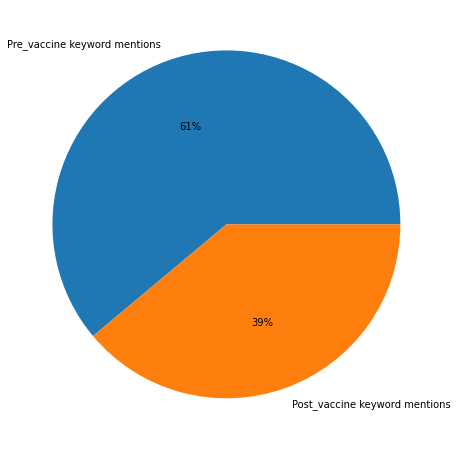

In [ ]:
# find occurence of keywords pre and post vaccine introduction 
pre_vacc = list(subreddit_data[subreddit_data['Vaccine Status']=='Pre-vaccine']['keyword_counts'])
print("There are", len(pre_vacc), "entries in the Pre-vaccine dataframe")
pre_vacc_total = 0 
for i in pre_vacc: 
  pre_vacc_total += i
print("Pre-vaccine total keyword mentions:", pre_vacc_total) 
print("Pre-vaccine keyword mention frequency:", pre_vacc_total/len(pre_vacc)) 

post_vacc = list(subreddit_data[subreddit_data['Vaccine Status']=='Post-vaccine']['keyword_counts'])
print("There are", len(post_vacc), "entries in the Post-vaccine dataframe")
post_vacc_total = 0 
for i in post_vacc: 
  post_vacc_total += i
print("Post-vaccine total keyword mentions:", post_vacc_total)
print("Post-vaccine keyword mention frequency:", post_vacc_total/len(post_vacc)) 

print("Pre-vaccine keyword mentions ratio:", pre_vacc_total/(post_vacc_total + pre_vacc_total)) 

plt.figure(figsize = (15,8)) 
plt.pie([pre_vacc_total, post_vacc_total], labels = ["Pre_vaccine keyword mentions", "Post_vaccine keyword mentions"], autopct='%.0f%%')
plt.show() 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

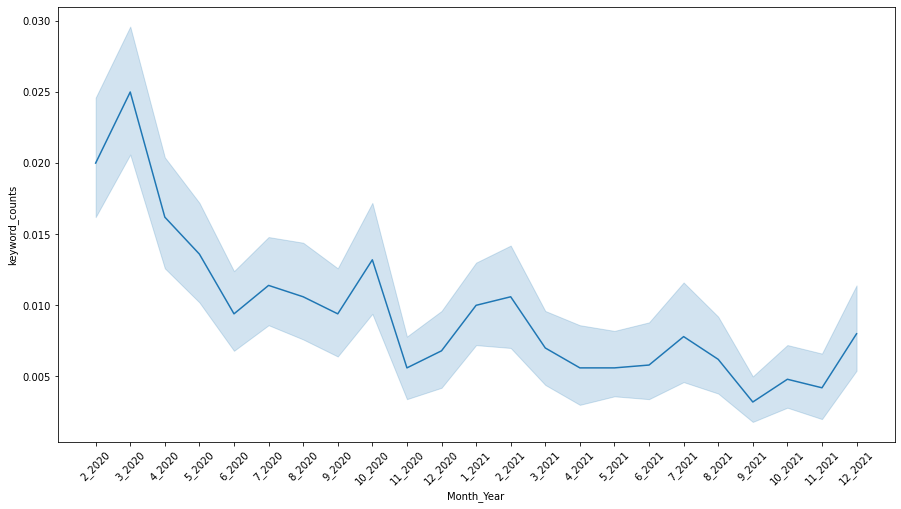

In [ ]:
# visualize occurence of keywords by time 
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=subreddit_data, x='Month_Year', y='keyword_counts') 
plt.xticks(rotation=45) 